In [3]:
# Step 1: Load the data
import pandas as pd
df = pd.read_excel("D://Khalid//Magang//PELNI_RevenueRegression//Revenue-Regression//revenueDaily.xlsx")
df = df.rename(columns={'tanggal': 'date'})
df = df.rename(columns={'penghasilan_muatan': 'y'})
# Step 2: Check data types and convert if necessary
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

data = df.loc[(df['kode_des']==431)] #ambil data by destination doang
data = data.groupby(['date'])['y'].sum()
data = pd.DataFrame(data)
data

,y
date,
2020-11-18,21891600.0
2020-11-25,27364500.0
2020-11-27,16123000.0
2020-11-28,7344400.0
2020-11-29,31336000.0
...,...
2023-03-27,160134712.0
2023-03-28,895757.0
2023-03-29,58286000.0


In [4]:
# Step 3: Check for missing values and handle them
print(data.isna().sum())  # check number of missing values
data = data.dropna()  # drop incomplete records

y    0
dtype: int64


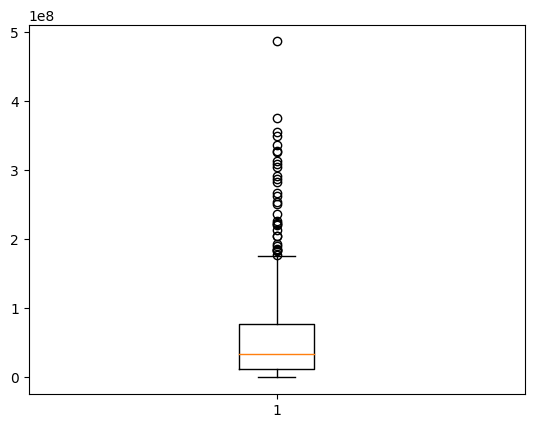

In [5]:
# Step 4: Check for outliers and anomalies
import matplotlib.pyplot as plt
plt.boxplot(data['y'])
plt.show()

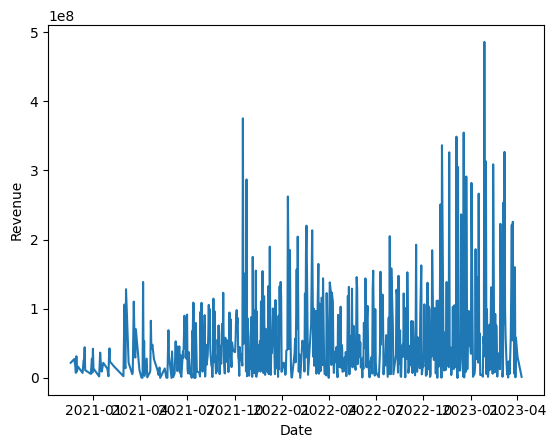

                  y
count  6.290000e+02
mean   5.551835e+07
std    6.434455e+07
min    7.994000e+03
25%    1.280100e+07
50%    3.407160e+07
75%    7.794424e+07
max    4.858937e+08


In [6]:
# Step 5: Plot time series data and examine its patterns
plt.plot(data.index, data['y'])
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()
print(data.describe())  # view summary statistics

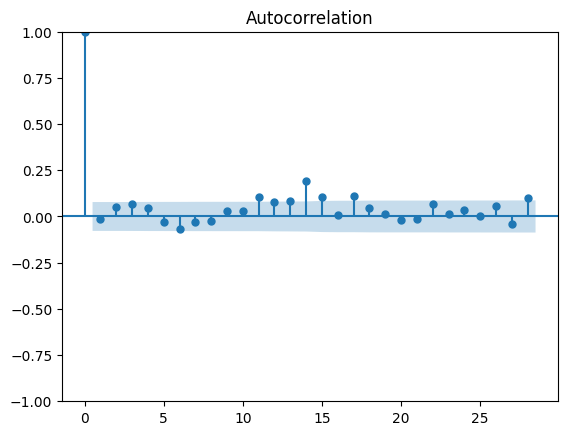

c:\Users\khali\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


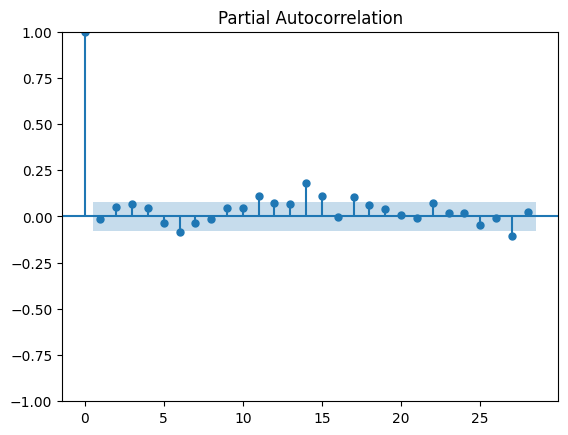

In [7]:
# Step 6: Plot autocorrelation and partial autocorrelation functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['y'])
plt.show()
plot_pacf(data['y'])
plt.show()

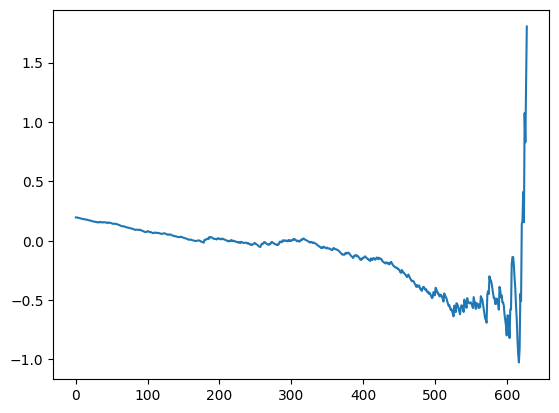

In [8]:
# Step 7: Plot cross-correlation functions
from statsmodels.tsa.stattools import ccf
ccf_data = ccf(data['y'], data.index)
plt.plot(ccf_data)
plt.show()

In [9]:
# Step 8: Use decomposition techniques
from statsmodels.tsa.seasonal import seasonal_decompose
data = data.asfreq('d')
data = data.interpolate(method='linear')
data = data.fillna(0)
decomposition = seasonal_decompose(data['y'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

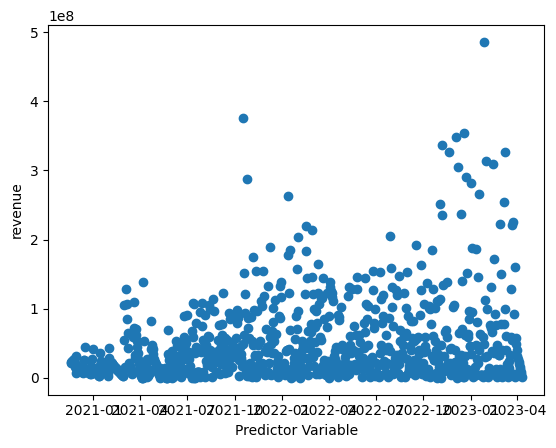

     y
y  1.0


In [10]:
# Step 9: Explore relationships between variables
plt.scatter(data.index, data['y'])
plt.xlabel('Predictor Variable')
plt.ylabel('revenue')
plt.show()
print(data.corr())

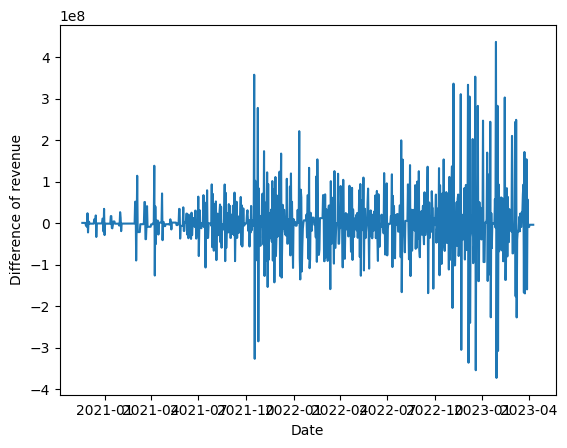

In [11]:
# Step 10: Identify any patterns or trends
plt.plot(data.index, data['y'].diff())
plt.xlabel('Date')
plt.ylabel('Difference of revenue')
plt.show()

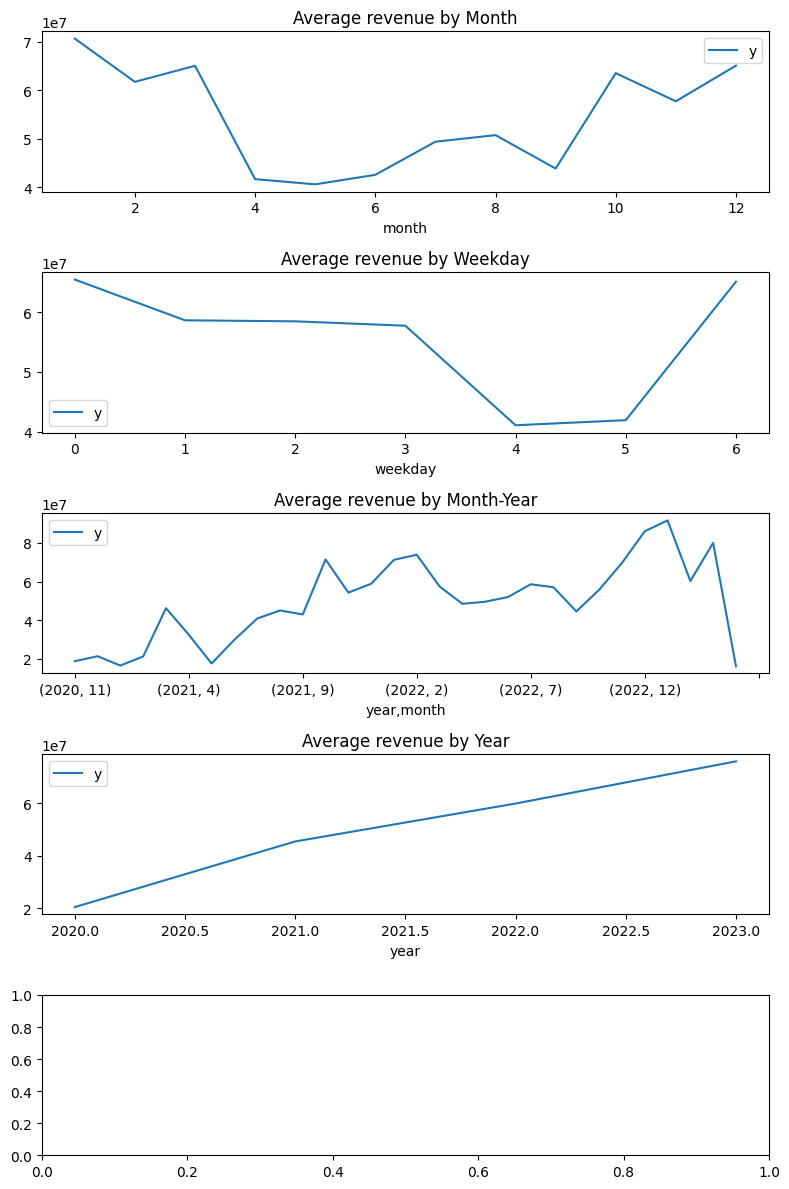

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_excel("D://Khalid//Magang//PELNI_RevenueRegression//Revenue-Regression//revenueDaily.xlsx")
df = df.rename(columns={'tanggal': 'date'})
df = df.rename(columns={'penghasilan_muatan': 'y'})

# convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
data = df.loc[(df['kode_des']==431)] #ambil data by destination doang
data = data.groupby(['date'])['y'].sum()
data = pd.DataFrame(data)
data = data.reset_index().rename(columns={'index': 'ds'})
data

# create columns for different time components
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['weekday'] = data['date'].dt.weekday
data['dayofyear'] = data['date'].dt.dayofyear

# group the data by different time components and compute summary statistics
grouped_season = data.groupby(['month']).mean()
grouped_weekday = data.groupby(['weekday']).mean()
grouped_month = data.groupby(['year', 'month']).mean()
grouped_year = data.groupby(['year']).mean()

# plot the summary statistics for each time component
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))

grouped_season.plot(y='y', ax=axes[0])
axes[0].set_title('Average revenue by Month')

grouped_weekday.plot(y='y', ax=axes[1])
axes[1].set_title('Average revenue by Weekday')

grouped_month.plot(y='y', ax=axes[2])
axes[2].set_title('Average revenue by Month-Year')

grouped_year.plot(y='y', ax=axes[3])
axes[3].set_title('Average revenue by Year')

plt.tight_layout()
plt.show()

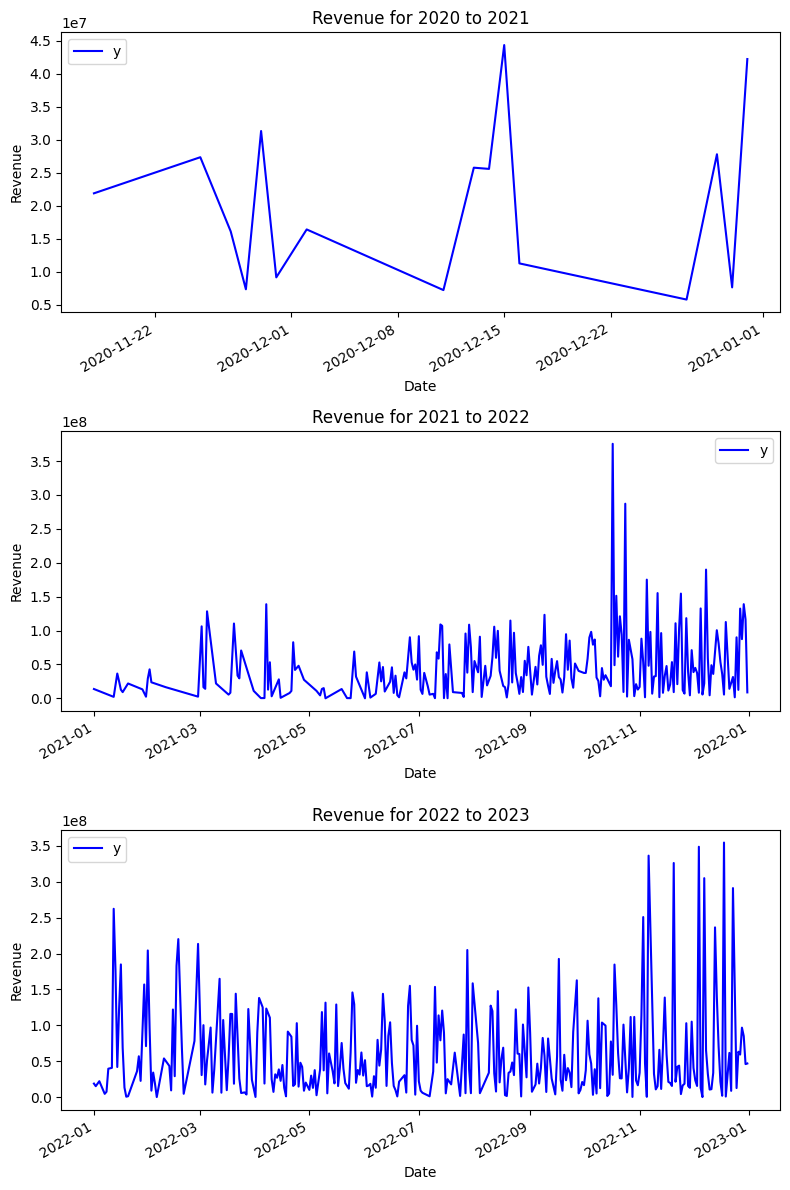

In [8]:
# create a column for the year
data['year'] = data['date'].dt.year

# plot the revenue for each year
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

for i, year in enumerate(range(2020, 2023)):
    start_date = pd.to_datetime(str(year))
    end_date = pd.to_datetime(str(year+1))
    year_data = data.loc[(data['date'] >= start_date) & (data['date'] < end_date)]
    year_grouped = year_data.groupby(['date']).sum()
    year_grouped.plot(y='y', ax=axes[i], color='blue')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Revenue')
    axes[i].set_title(f'Revenue for {year} to {year+1}')

plt.tight_layout()
plt.show()

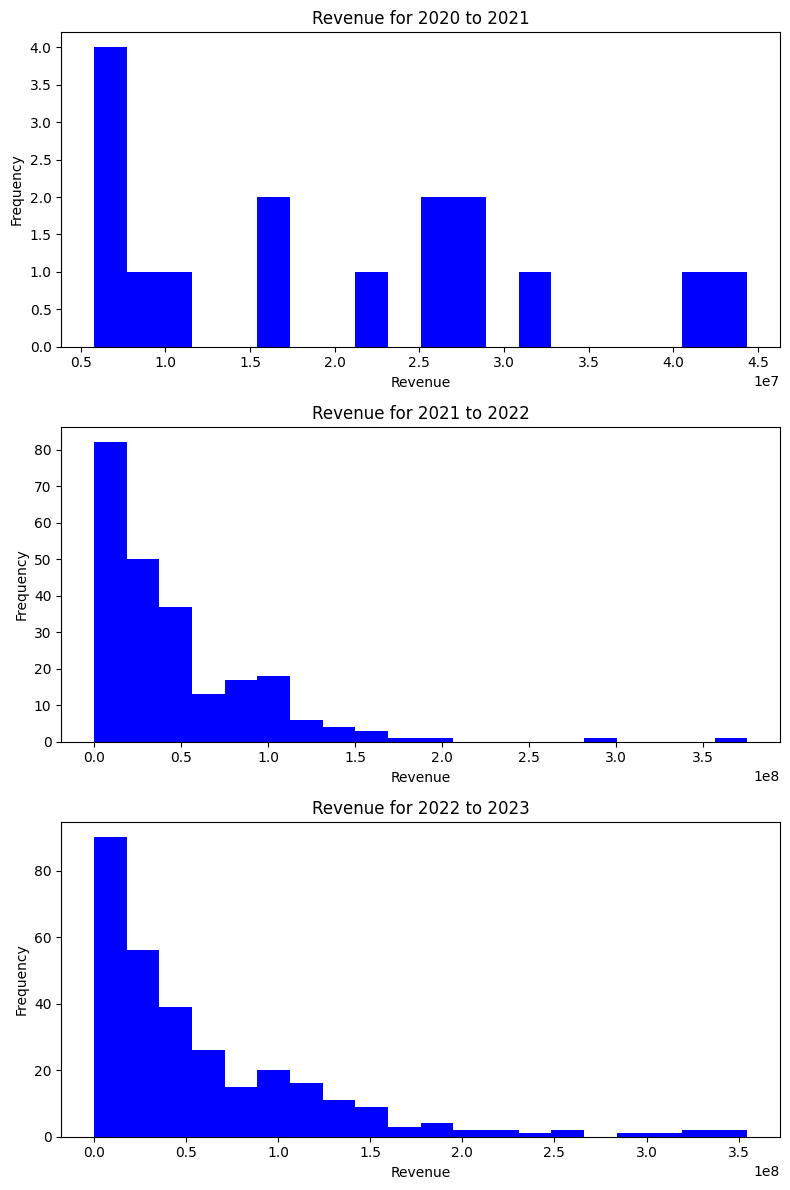

In [12]:
# create a column for the year
data['year'] = data['date'].dt.year

# plot the revenue for each year
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

for i, year in enumerate(range(2020, 2023)):
    start_date = pd.to_datetime(str(year))
    end_date = pd.to_datetime(str(year+1))
    year_data = data.loc[(data['date'] >= start_date) & (data['date'] < end_date)]
    year_revenue = year_data['y']
    axes[i].hist(year_revenue, bins=20, color='blue')
    axes[i].set_xlabel('Revenue')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Revenue for {year} to {year+1}')

plt.tight_layout()
plt.show()